In [54]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
import sys
from tqdm.autonotebook import tqdm

sys.path.append('../..')
from nld_utils import simulate_baier_klein, simulate_double_pendulum, simulate_lorenz, simulate_rossler

In [56]:
# window is in time steps
# pts has shape (num_time_steps, num_dims)
def compute_eigs(pts, window):
    num_win = int(np.ceil(pts.shape[0]/window))
    eigs = np.zeros((num_win, pts.shape[1]))
    for i, t in enumerate(tqdm(np.arange(0, pts.shape[0],window))):
        chunk = pts[max(0,t-1):t+window]
        model = VAR(chunk)
        results = model.fit(1)
        e,_ = np.linalg.eig(results.coefs[0])      
        eigs[i] = np.abs(np.real(e))
    
    return eigs

# Lorenz

In [57]:
T = 100 # s, duration of time series
dt = 0.02 # s, time step
lorenz_pts = simulate_lorenz(dt=dt, T=T)

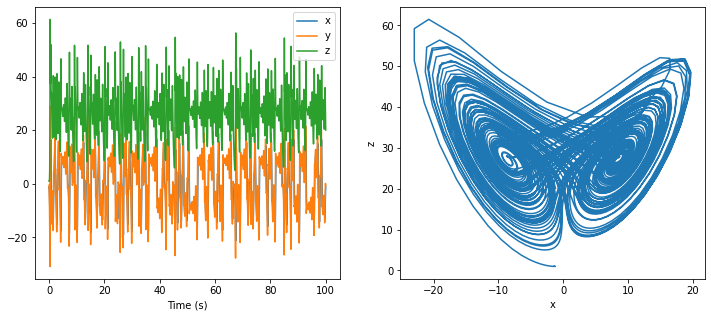

In [58]:
plt.figure(figsize=(12, 5))
time_vals = np.arange(lorenz_pts.shape[0])*dt
plt.subplot(1, 2, 1)
plt.plot(time_vals, lorenz_pts[:, 0], label='x')
plt.plot(time_vals, lorenz_pts[:, 1], label='y')
plt.plot(time_vals, lorenz_pts[:, 2], label='z')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lorenz_pts[:, 0], lorenz_pts[:, 2])
plt.xlabel('x')
plt.ylabel('z')

plt.show()

## VAR Stuff

In [59]:
window = 5 # s
eigs = compute_eigs(lorenz_pts, int(window/dt))

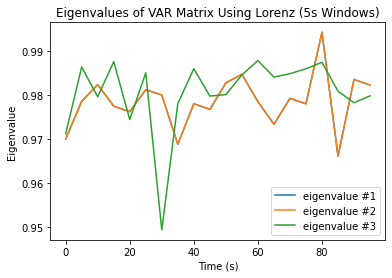

In [61]:
for i in range(3):
    plt.plot(np.arange(len(eigs))*window, eigs[:, i], label=f'eigenvalue #{i + 1}')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Eigenvalue')
plt.title(f'Eigenvalues of VAR Matrix Using Lorenz ({window}s Windows)')
plt.show()

# Baier-Klein

In [62]:
T = 5000 # s, duration of time series
baier_klein_pts = simulate_baier_klein(T=T)

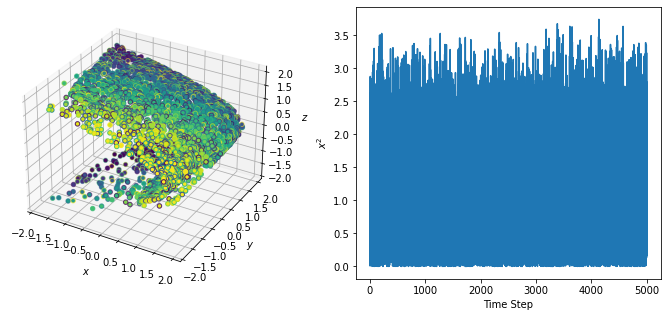

In [63]:
fig = plt.figure(figsize=(12, 5))
time_vals = np.arange(T)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(baier_klein_pts[:, 0], baier_klein_pts[:, 1], baier_klein_pts[:, 2], c=time_vals)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.subplot(1, 2, 2)
plt.plot(baier_klein_pts[:, 0]**2)
plt.xlabel('Time Step')
plt.ylabel('$x^2$')
plt.show()

plt.show()

## VAR Stuff

In [64]:
window = 250 # s
eigs = compute_eigs(baier_klein_pts, window)

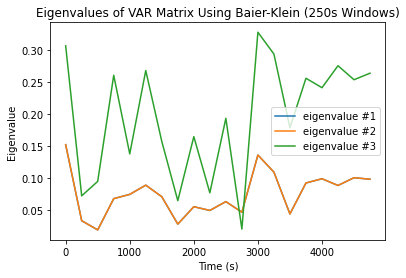

In [65]:
for i in range(3):
    plt.plot(np.arange(len(eigs))*window, eigs[:, i], label=f'eigenvalue #{i + 1}')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Eigenvalue')
plt.title(f'Eigenvalues of VAR Matrix Using Baier-Klein ({window}s Windows)')
plt.show()

# The Rössler System
Defined:
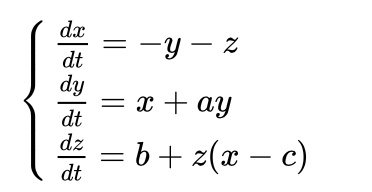

In [66]:
T = 100 # s
dt = 0.02 # s
rossler_pts = simulate_rossler(T=T, dt=dt)

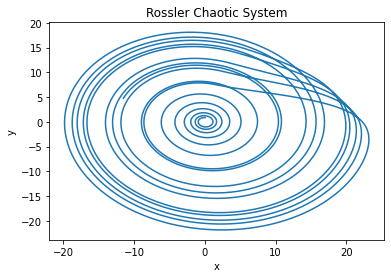

In [67]:
plt.plot(rossler_pts[:, 0], rossler_pts[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Rossler Chaotic System")
plt.show()

## VAR Stuff

In [68]:
window = 5 # s
eigs = compute_eigs(rossler_pts, int(window/dt))

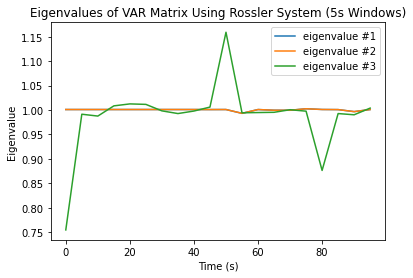

In [69]:
for i in range(3):
    plt.plot(np.arange(len(eigs))*window, eigs[:, i], label=f'eigenvalue #{i + 1}')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Eigenvalue')
plt.title(f'Eigenvalues of VAR Matrix Using Rossler System ({window}s Windows)')
plt.show()

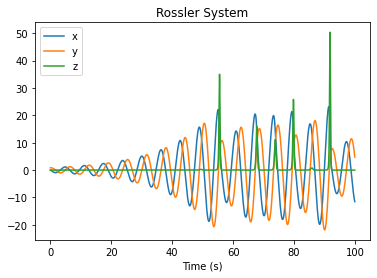

In [70]:
plt.plot(time_vals*dt, rossler_pts[:, 0], label='x')
plt.plot(time_vals*dt, rossler_pts[:, 1], label='y')
plt.plot(time_vals*dt, rossler_pts[:, 2], label='z')
plt.xlabel('Time (s)')
plt.title("Rossler System")
plt.legend()
plt.show()

# Double Pendulum

In [104]:
T = 25
dt = 0.005
pendulum_pts = simulate_double_pendulum(T=T, dt=dt)

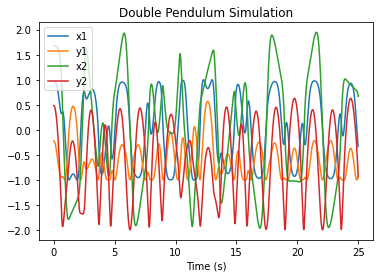

In [105]:
for i in range(4):
    plt.plot(np.arange(pendulum_pts.shape[0])*dt, pendulum_pts[:, i], label=['x1', 'y1', 'x2', 'y2'][i])
plt.legend()
plt.xlabel('Time (s)')
plt.title('Double Pendulum Simulation')
plt.show()

## VAR Stuff

In [106]:
window = 1.25 # s
eigs = compute_eigs(pendulum_pts, int(window/dt))

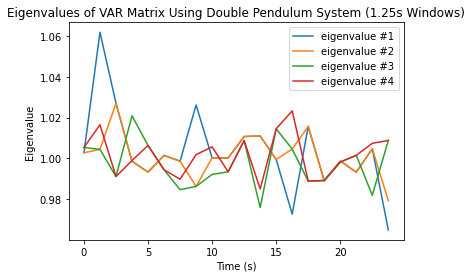

In [107]:
for i in range(4):
    plt.plot(np.arange(len(eigs))*window, eigs[:, i], label=f'eigenvalue #{i + 1}')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Eigenvalue')
plt.title(f'Eigenvalues of VAR Matrix Using Double Pendulum System ({window}s Windows)')
plt.show()

## Just for Fun Let's Make a GIF

In [119]:
from matplotlib.patches import Circle
import os
frame_dir = '/Users/adameisen/Desktop/frames'
os.makedirs(frame_dir, exist_ok=True)

In [120]:
x1, y1, x2, y2 = pendulum_pts[:, 0], pendulum_pts[:, 1], pendulum_pts[:, 2], pendulum_pts[:, 3]

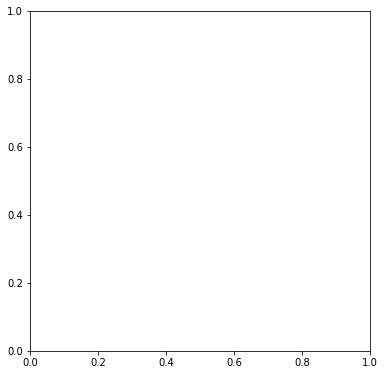

In [122]:
# Plotted bob circle radius
r = 0.05
# Plot a trail of the m2 bob's position for the last trail_secs seconds.
trail_secs = 1
# This corresponds to max_trail time points.
max_trail = int(trail_secs / dt)

def make_plot(i):
    # Plot and save an image of the double pendulum configuration for time
    # point i.
    # The pendulum rods.
    ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
    # Circles representing the anchor point of rod 1, and bobs 1 and 2.
    c0 = Circle((0, 0), r/2, fc='k', zorder=10)
    c1 = Circle((x1[i], y1[i]), r, fc='b', ec='b', zorder=10)
    c2 = Circle((x2[i], y2[i]), r, fc='r', ec='r', zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)
    ax.add_patch(c2)

    # The trail will be divided into ns segments and plotted as a fading line.
    ns = 20
    s = max_trail // ns

    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0:
            continue
        imax = imin + s + 1
        # The fading looks better if we square the fractional length along the
        # trail.
        alpha = (j/ns)**2
        ax.plot(x2[imin:imax], y2[imin:imax], c='r', solid_capstyle='butt',
                lw=2, alpha=alpha)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-L1-L2-r, L1+L2+r)
    ax.set_ylim(-L1-L2-r, L1+L2+r)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.savefig(os.path.join(frame_dir, '_img{:04d}.png'.format(i//di)), dpi=72)
    plt.cla()


# Make an image every di time points, corresponding to a frame rate of fps
# frames per second.
# Frame rate, s-1
fps = 10
di = int(1/fps/dt)
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

for i in tqdm(range(0, t.size, di)):
#     print(i // di, '/', t.size // di)
    make_plot(i)

To convert to gif, install imagemagick and enter in terminal:

```convert -dispose previous -delay 8 *.png animation.gif```